# Projeto: Análise e Predição de BackOrders de Produtos

- Etapa 01: Conhecer, Preparar e Limpar os Dados (análise preliminar de Features)
    - https://s3-us-west-2.amazonaws.com/rnp2017ufg/projeto_final/BackOrders_Etapa01_Cleaning-Data-Train.html
    - https://s3-us-west-2.amazonaws.com/rnp2017ufg/projeto_final/BackOrders_Etapa01_Cleaning-Data-Test.html
- Etapa 02: Análise mais detalhada de Features
    - https://s3-us-west-2.amazonaws.com/rnp2017ufg/projeto_final/BackOrders_Etapa02_EDA-Trend-Analysis-Train.html
    - https://s3-us-west-2.amazonaws.com/rnp2017ufg/projeto_final/BackOrders_Etapa02_EDA-Trend-Analysis-Test.html
- Etapa 03: Geração de Modelos e Avaliação dos Resultados

### Etapa 03: Geração de Modelos e Avaliação dos Resultados

Etapa 3 - Objetivos:
- Criação e Execução dos Modelos
- Análise Visual e Avaliação
- Análise dos Resultados

In [1]:
# importando pacotes
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#carregando datasets
# treino
df_treino = pd.read_csv('data/Backorder_Treino_clean.csv')
# teste
df_teste = pd.read_csv('data/Backorder_Teste_clean.csv')

In [3]:
df_treino.info

<bound method DataFrame.info of              sku  national_inv  lead_time  in_transit_qty  forecast_3_month  \
0        1026827      0.000000        8.0        0.000000          0.000000   
1        1043384      1.000000        9.0        0.000000          0.000000   
2        1043696      1.000000        8.0        0.000000          0.000000   
3        1043852      0.989949        8.0        0.000000          0.000000   
4        1044048      0.872872        8.0        0.000000          0.000000   
5        1044198      1.000000        8.0        0.000000          0.000000   
6        1044643      0.999993        8.0        0.000000          0.000000   
7        1045098      1.000000        2.0        0.000000          0.000000   
8        1045815      0.592005        8.0        0.000000          0.063429   
9        1045867      1.000000        8.0        0.000000          0.000000   
10       1045918      0.000000        2.0        0.000000          0.000000   
11       1047146    

In [4]:
df_treino = df_treino[:-1600000]

In [5]:
df_teste = df_teste[:-140000]

In [6]:
df_teste

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,0.999870,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.77934,0.776331,0.0,1,0,0,1,0,0
1,3285131,0.993884,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.77934,0.776331,0.0,0,0,1,0,0,0
2,3285358,1.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.92000,0.950000,0.0,0,0,0,1,0,0
3,3285517,0.976187,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.78000,0.750000,0.0,0,0,1,1,0,0
4,3285608,1.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.54000,0.710000,0.0,0,0,0,1,0,0
5,3285960,0.989071,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065938,...,0.0,0.37000,0.680000,0.0,0,0,0,1,0,0
6,3286073,0.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.77934,0.776331,0.0,0,0,0,1,0,0
7,3286113,1.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.77934,0.776331,0.0,1,0,0,1,0,0
8,3286206,1.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.77934,0.776331,0.0,1,0,1,1,0,0
9,3286325,1.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.77934,0.776331,0.0,0,0,0,1,0,0


In [7]:
df_treino

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.782381,0.776976,0.0,0,0,0,1,0,0
1,1043384,1.000000,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.990000,0.990000,0.0,0,0,0,1,0,0
2,1043696,1.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.782381,0.776976,0.0,1,0,0,1,0,0
3,1043852,0.989949,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.100000,0.130000,0.0,0,0,0,1,0,0
4,1044048,0.872872,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.782381,0.776976,0.0,1,0,0,1,0,0
5,1044198,1.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.820000,0.870000,0.0,0,0,0,1,0,0
6,1044643,0.999993,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.782381,0.776976,0.0,1,0,0,1,0,0
7,1045098,1.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1,0,1,1,0,0
8,1045815,0.592005,8.0,0.000000,0.063429,0.482061,0.642748,0.000000,0.000000,0.000000,...,0.000000,0.782381,0.776976,0.0,0,0,0,1,0,0
9,1045867,1.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.820000,0.870000,0.0,0,0,0,1,0,0


In [8]:
x_treino = df_treino.drop('went_on_backorder', axis=1).values
y_treino = df_treino['went_on_backorder'].values

In [9]:
x_teste = df_teste.drop('went_on_backorder', axis=1).values
y_teste = df_teste['went_on_backorder'].values

In [10]:
x_treino_MLP = x_treino
y_treino_MLP = y_treino
x_teste_MLP = x_teste
y_teste_MLP = y_teste

#### Pacotes
- scikit-learn
    - Machine Learning in Python
    - User Guide
        - http://scikit-learn.org/stable/user_guide.html
        1. Supervised learning
        2. Unsupervised learning
        3. Model selection and evaluation
        4. Dataset transformations
        5. Dataset loading utilities
        6. Strategies to scale computationally: bigger data
        7. Computational Performance


- imbalanced-learn
    - SMOTE, under-sampling and over-sampling methods
        - http://contrib.scikit-learn.org/imbalanced-learn/stable/index.html
    - About
        - http://contrib.scikit-learn.org/imbalanced-learn/stable/about.html

In [11]:
# http://scikit-learn.org/stable/supervised_learning.html
from sklearn import tree, ensemble

In [12]:
# http://contrib.scikit-learn.org/imbalanced-learn/stable/under_sampling.html
from imblearn.under_sampling import RandomUnderSampler

#http://contrib.scikit-learn.org/imbalanced-learn/stable/generated/imblearn.pipeline.make_pipeline.html
from imblearn.pipeline import make_pipeline

#### Compare the effect of different scalers on data with outliers
- http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

In [13]:
#usando Scaler para os modelos MLP (Redes Neurais)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer

#scaler = StandardScaler()  
scaler = RobustScaler()

In [14]:
# http://scikit-learn.org/stable/modules/neural_networks_supervised.html#tips-on-practical-use
scaler.fit(x_treino_MLP)  
x_treino_MLP = scaler.transform(x_treino_MLP)  
x_teste_MLP = scaler.transform(x_teste_MLP)  

In [15]:
# http://scikit-learn.org/stable/modules/neural_networks_supervised.html
from sklearn.neural_network import MLPClassifier

In [16]:
# http://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(x_treino_MLP, y_treino_MLP)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [17]:
# http://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification
clfMultiLabel = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,), random_state=1)
clfMultiLabel.fit(x_treino_MLP, y_treino_MLP)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [18]:
cart = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5)
rus = make_pipeline(RandomUnderSampler(),tree.DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5))
forest = ensemble.RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5)
#gboost = ensemble.GradientBoostingClassifier(max_depth=15, min_samples_leaf=5)

In [19]:
cart.fit(x_treino, y_treino)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
rus.fit(x_treino, y_treino)

Pipeline(memory=None,
     steps=[('randomundersampler', RandomUnderSampler(random_state=None, ratio='auto', replacement=False,
          return_indices=False)), ('decisiontreeclassifier', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
          ...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [21]:
forest.fit(x_treino, y_treino)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
#gboost.fit(x_treino, y_treino)

In [37]:
# http://scikit-learn.org/stable/modules/ensemble.html
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
ub = BaggingClassifier(warm_start=True, n_estimators=0)

n_splits = 10

for split in range(n_splits):
    X_res, y_res = RandomUnderSampler(random_state=split).fit_sample(x_treino,y_treino) 
    ub.n_estimators += 1
    ub.fit(X_res, y_res)

In [24]:
#from sklearn import svm

In [25]:
#rbf_svc = svm.SVC(kernel='rbf', probability=True)

In [26]:
#rbf_svc.fit(x_treino, y_treino)

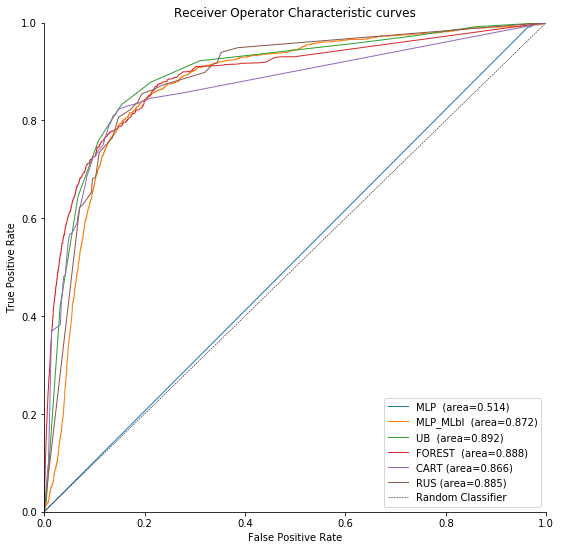

In [45]:
# http://scikit-learn.org/stable/modules/model_evaluation.html
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(9,9))

roc_auc_plot(y_teste_MLP,clf.predict_proba(x_teste_MLP),label='MLP ',l='-')
roc_auc_plot(y_teste_MLP,clfMultiLabel.predict_proba(x_teste_MLP),label='MLP_MLbl ',l='-')
roc_auc_plot(y_teste,ub.predict_proba(x_teste),label='UB ',l='-')
roc_auc_plot(y_teste,forest.predict_proba(x_teste),label='FOREST ',l='-')
roc_auc_plot(y_teste,cart.predict_proba(x_teste),label='CART', l='-')
roc_auc_plot(y_teste,rus.predict_proba(x_teste),label='RUS',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        label='Random Classifier')    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()
plt.show()

In [28]:
#roc_auc_plot(y_teste,rbf_svc.predict_proba(x_teste),label='SVM_RBF ',l='-')
#rbf_svc.predict_proba(x_teste)

In [29]:
clf.predict_proba(x_teste_MLP)

array([[0.76854243, 0.23145757],
       [0.76854243, 0.23145757],
       [0.76854243, 0.23145757],
       ...,
       [0.76854243, 0.23145757],
       [0.76854243, 0.23145757],
       [0.76854243, 0.23145757]])

In [30]:
clfMultiLabel.predict_proba(x_teste_MLP)

array([[9.98934019e-01, 1.06598073e-03],
       [9.99076413e-01, 9.23586955e-04],
       [9.96372532e-01, 3.62746814e-03],
       ...,
       [9.64966120e-01, 3.50338802e-02],
       [9.71858138e-01, 2.81418624e-02],
       [9.95506455e-01, 4.49354516e-03]])

In [39]:
roc_auc_plot(y_teste_MLP,clf.predict_proba(x_teste_MLP),label='MLP ',l='-')
roc_auc_plot(y_teste_MLP,clfMultiLabel.predict_proba(x_teste_MLP),label='MLP_MLbl ',l='-')

In [32]:
ub.predict_proba(x_teste)

array([[0.7, 0.3],
       [0.8, 0.2],
       [0.9, 0.1],
       ...,
       [0.8, 0.2],
       [0.8, 0.2],
       [0.7, 0.3]])

In [33]:
forest.predict_proba(x_teste)

array([[1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [9.99676633e-01, 3.23367153e-04],
       ...,
       [1.00000000e+00, 0.00000000e+00],
       [9.98488795e-01, 1.51120549e-03],
       [1.00000000e+00, 0.00000000e+00]])

In [34]:
cart.predict_proba(x_teste)

array([[1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       ...,
       [9.99046348e-01, 9.53652489e-04],
       [9.99046348e-01, 9.53652489e-04],
       [1.00000000e+00, 0.00000000e+00]])

In [35]:
rus.predict_proba(x_teste)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.74666667, 0.25333333],
       [0.74666667, 0.25333333],
       [1.        , 0.        ]])

In [40]:
#roc_auc_plot(y_teste,svecm.predict_proba(x_teste),label='SVM ',l='-')
roc_auc_plot(y_teste,ub.predict_proba(x_teste),label='UB ',l='-')
roc_auc_plot(y_teste,forest.predict_proba(x_teste),label='FOREST ',l='-')
roc_auc_plot(y_teste,cart.predict_proba(x_teste),label='CART', l='-')
roc_auc_plot(y_teste,rus.predict_proba(x_teste),label='RUS',l='-')
#roc_auc_plot(y_teste,gboost.predict_proba(x_teste),label='GB ',l='-')

In [44]:
ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        label='Random Classifier')    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()
plt.show()

<Figure size 432x288 with 0 Axes>

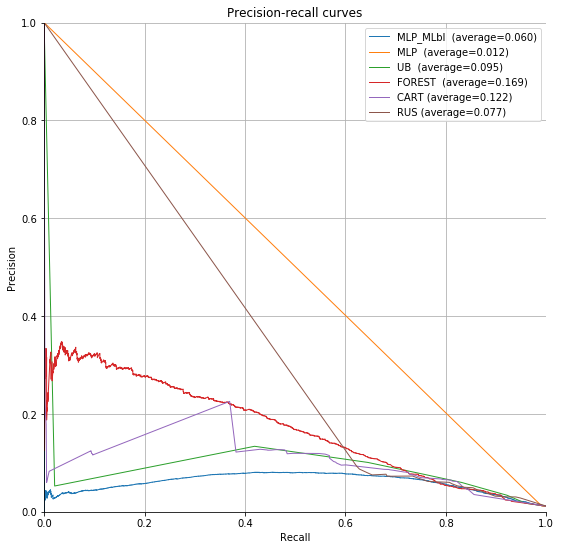

In [46]:
# http://scikit-learn.org/stable/modules/model_evaluation.html
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_teste,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_teste, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(9,9))

precision_recall_plot(y_teste_MLP,clfMultiLabel.predict_proba(x_teste_MLP),label='MLP_MLbl ',l='-')
precision_recall_plot(y_teste_MLP,clf.predict_proba(x_teste_MLP),label='MLP ',l='-')
precision_recall_plot(y_teste,ub.predict_proba(x_teste),label='UB ',l='-')
precision_recall_plot(y_teste,forest.predict_proba(x_teste),label='FOREST ',l='-')
precision_recall_plot(y_teste,cart.predict_proba(x_teste),label='CART',l='-')
precision_recall_plot(y_teste,rus.predict_proba(x_teste),label='RUS',l='-')

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="upper right")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()
plt.show()

In [ ]:
#precision_recall_plot(y_teste,rbf_svc.predict_proba(x_teste),label='SVM_RBF ',l='-')

In [ ]:
precision_recall_plot(y_teste_MLP,clfMultiLabel.predict_proba(x_teste_MLP),label='MLP_MLbl ',l='-')
precision_recall_plot(y_teste_MLP,clf.predict_proba(x_teste_MLP),label='MLP ',l='-')

In [ ]:
#precision_recall_plot(y_teste,svecm.predict_proba(x_teste),label='SVM ',l='-')
precision_recall_plot(y_teste,ub.predict_proba(x_teste),label='UB ',l='-')
precision_recall_plot(y_teste,forest.predict_proba(x_teste),label='FOREST ',l='-')
precision_recall_plot(y_teste,cart.predict_proba(x_teste),label='CART',l='-')
precision_recall_plot(y_teste,rus.predict_proba(x_teste),label='RUS',l='-')
#precision_recall_plot(y_teste,gboost.predict_proba(x_teste),label='GB',l='-')

In [ ]:
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="upper right")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()
plt.show()

In [47]:
from sklearn import metrics
metrics.f1_score(y_teste, forest.predict(x_teste))  

0.0016722408026755853

In [48]:
metrics.f1_score(y_teste, ub.predict(x_teste))  

0.1117963224893918

In [49]:
metrics.f1_score(y_teste, cart.predict(x_teste))  

0.01078582434514638

In [50]:
metrics.f1_score(y_teste, rus.predict(x_teste))  

0.0995115995115995

In [51]:
metrics.f1_score(y_teste_MLP, clfMultiLabel.predict(x_teste_MLP))  

0.13553361287704585

In [52]:
metrics.f1_score(y_teste_MLP, clf.predict(x_teste_MLP))

/home/joaoluiz/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [53]:
metrics.f1_score(y_teste, rbf_svc.predict(x_teste))  

NameError: name 'rbf_svc' is not defined